# Urbasis Training 2021_06

To run this notebook locally, see [README.md](https://github.com/rizac/urbasis_training_2021_06)

(Python version: 3.9.1, ObsPy version: 1.2.2, pandas version: 1.2.4)


<!--
#########################################################

(Python version: 3.9.1, ObsPy version: 1.2.2, pandas version: 1.2.4)

 - https://docs.obspy.org/packages/obspy.clients.fdsn.html
 - https://github.com/obspy/docs/blob/master/workshops/2017-10-25_iris_stcu/ObsPy%20Tutorial/

-->

## Introduction

In this notebook, we will show some examples and snippets on working with web services and seismic libraries.

Before getting into more details, let's quickly picture the overall framework of Information Technology (or IT, i.e. anything related to computing technology) in seismology

### Version control systems (VCS)

VCSs manage changes in your code. Of paticular importance when you want to easily collaborate with others, keep your code synchronized, move back and forth to different versions. [git](https://git-scm.com/) is the most popular nowadays (not covering other VCSs here such as `svn`). A VCS has not to be confused with its hosting/management web platform, e.g. [gitlab](https://about.gitlab.com) and [github](https://github.com/), [bitbucket](https://bitbucket.org) among others 


### Editor / Integrated Development Environments (IDE)

<img align="right" width='300' height="200" src="https://www.jetbrains.com/pycharm/img/screenshots/complexLook@2x.jpg">

Text editors are the simplest and straighforward choice (as a bare minimum with syntax highlight to make the screen readable. E.g. `notepad++`, `sublime text`, `gedit`, `vim`, ...), IDEs, i.e. basically all-in-one tools with a text editor **and** several features for checking, debugging, executing code (e.g. [PyCharm for Python](https://www.jetbrains.com/pycharm/)), efficiently showcase your work (this Jupyter Notebook), and many others that you can easily find online

### Programming languages

Several porgramming languages are available in sesimology and scientific computing in general: [Python](https://www.python.org) (general-purpose language), [R](https://www.r-project.org/) (environment for statistical computing and graphics, open source), [matlab](https://www.mathworks.com/products/matlab.html) (non-open source platform for mathematical and technical computing, non open source) and many others.

**We will focus in the remaninder on Python 3 only** (by the way, you are [not using Python v2](https://www.python.org/doc/sunset-python-2/) right?) 

### Package / Environment managers

Environment managers create so-called `Virtualenv`s, i.e., clones of yopur Python installation isolated from the global Python interpreter of your OS, where you can install/uninstall safely any dependency. Package managers handle required external Python packages (aka dependencies) in the Python environment. There are solutions providing both package + environment manager, as [Anaconda](https://www.anaconda.com/products/individual), but later Python versions made quite easy to manage the two with `venv` and `pip` without additional tools. For instance, in a terminal:

```bash
python3 -m venv $venv_path # create Virtualenv (once only operation)
```

```bash
source $venv_path/bin/activate # activate it
# do your work (code, execute, start a notebook, install/uninstall stuff with 'pip install <package>') and eventually:
deactivate # deactivate virtual env
```

Alternatively, 

### Code quality

(no, [this isn't an ornament](https://www.researchgate.net/publication/265130918_Better_Software_Better_Research). As a rule of thumb, the bigger the project, the more quality check is required)

  - PEP8 (code style guidelines) [cheatsheet here, little bit outdated but still ok](https://gist.github.com/RichardBronosky/454964087739a449da04)
  - Pylint (linting, i.e., code analysis) [pylint](https://www.pylint.org/)
  - Testing ([intro here](https://realpython.com/python-testing/))

### Python Libraries

Important external scientific libraries:
   
  - [numpy](https://numpy.org/doc/stable/user/whatisnumpy.html) scientific package for fast computing. It basically allows C-comparable speed when operating on numeric arrays (not reachable with normal Python `for loop`). As such, it basically required by all scientific computing libraries, e.g.:
  - [ObsPy](https://docs.obspy.org/): framework for processing seismological data. Nice collection of notebooks [here](https://github.com/obspy/docs))
  - [pandas](https://pandas.pydata.org/docs/): library for data manipulation and analysis, in particular tabular data (similar to R's DataFrame for those familiar with it)
  - Machine / Deep Learning:
    - [scikit-learn](https://scikit-learn.org/stable/user_guide.html): machine learning library
    - [Keras](https://keras.io/guides/) (based on [tensorflow](https://www.tensorflow.org/)): deep learning library
  
### Popular file formats (and relative Python library):
      
   | format | focus | library (*=builtin, no installation needed) |
   |:-----|:------|:--------|
   | [JSON](https://www.w3schools.com/js/js_json_intro.asp) | popular format for data transferred through internet | [json](https://docs.python.org/3/library/json.html) (*) |
   | [XML](https://www.w3schools.com/xml/xml_whatis.asp) | station metadata/event | [xmltree](https://docs.python.org/3/library/xml.etree.elementtree.html) (*) |
   | [miniSEED](http://ds.iris.edu/ds/nodes/dmc/data/formats/miniseed/) | seismic waveform format | [ObsPy](https://docs.obspy.org/) (and others) |
   | [HDF](https://www.hdfgroup.org/solutions/hdf5/) | store and organize large amounts of data (including tabular data) | [pandas](https://pandas.pydata.org/docs/), [pytables](https://www.pytables.org/)|
   | [ASDF](https://asdf-definition.readthedocs.io/en/latest/) | A recent new format to store seismic data | [pyasdf](https://seismicdata.github.io/pyasdf/)|

### GEOFON software page

https://geofon.gfz-potsdam.de/software/

### (Pro bono) Hints and suggestions

- Do not hesitate to spend some time exploring the right tool: *adopt any new tool if needed, do not adopt blindly any new tool*. Even *this* Jupyter notebook might not be the best choice for coding (see e.g. section "Problems noted" in [this article](https://www.nature.com/articles/d41586-018-07196-1))

- When coding, be particularly aware of *logic errors* (details [here] (https://textexpander.com/blog/the-7-most-common-types-of-errors-in-programming-and-how-to-avoid-them)): if your programs does not break but simply produces the wrong (unnoticed) result, *so will be your publication*. To decrease the chance of these errors, **see Section "Code quality" above**

- Do not hesitate to contribute to code changes, bugfixes in any open source library you use through git repositories

## Internet transfer: Response-request 

Every time you got to a web page, you issue a request to a server. As its name says, the latter "serves" a response, whose `body` is a sequence of bytes (generally HTML formatted data) which is rendered and visualized by your browser. This principle can be generalized to any web service request as follows:

<table>
    <tr>
        <td>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Computer.svg/300px-Computer.svg.png">
        </td>
        <td style="text-align:center; font-size:150%">
            &rarr; Request &rarr;
            <br>
            <br>
            &larr; Response &larr;
        </td>
        <td>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Gorilla-server.svg/300px-Gorilla-server.svg.png">
        </td>
    </tr>
    <tr>
        <td style="text-align:center; font-size:150%">Client</td>
        <td></td>
        <td style="text-align:center; font-size:150%">Server / Web service</td>
</table>



### Request

A request made by the client is usually composed of a method, header, and optional body. 

Usually, the user just need to know the URL of the web service, and in some cases specify the request method, which in seismological web services is ususally either GET or POST (full details [here](https://www.w3schools.com/tags/ref_httpmethods.asp)):


|METHOD|URL|BODY|
|:--- |:--- |:--- |
|GET | <font color='black'>http:/&#47;eida.ethz.ch/fdsnws/station/1/query?</font><font color='red'>net</font>=<font color='blue'>CH</font>& <font color='red'>sta</font>=<font color='blue'>L*</font>&<font color='red'>format</font>=<font color='blue'>text</font> ||
|POST| http:/&#47;eida.ethz.ch/fdsnws/station/1/query | format=text<br>CH L* * * * *|
 

The request is usually performed via client software such as command line applications (e.g. [wget](https://www.gnu.org/software/wget/) or [curl](https://curl.se/)), web portal (see e.g. [ESCM](https://www.seismicportal.eu/fdsn-wsevent.html)), or custom code implemented with Programming language libraries (e.g., in Python, the [builtin urrlib package](https://docs.python.org/3/library/urllib.request.html#module-urllib.request) or the [seismic ObsPy library](https://docs.obspy.org/)). Note that, as said above, you can always type a GET URL in your browser: this is obviously quite cumbersome way to fetch data, but it might be useful sometimes to quickly test a the received response


### Response

The server response is composed of a status code, a header and a message body (e.g. XML, JSON, plain text, HTML).


The response body depends on the specification of the web service. In seismology, we usually differentiate between three main catagories:

 - event web service
 - station / medatada web services
 - data web services

### Accessing seismological web services: FDSN
The [The International Federation of Digital Seismograph Networks (FDSN)](https://www.fdsn.org/)
defines standards for [web services](https://www.fdsn.org/services/) providing seismic and related data over the web:


  <!-- - FDSN Web Service Specification Commonalities version 1.2 (2019-06-27)-->
  -  fdsnws-event version 1.2 (2019-06-27) – For access to event parameters in **QuakeML** (or text) **format**
  -  fdsnws-station version 1.1 (2019-06-27) – For access to station metadata in **FDSN StationXML** (or text) **format**
  -  fdsnws-dataselect version 1.1 (2019-06-27) – For access to time series data in **miniSEED format**
  <!-- -  fdsnws-availability (2019-06-27) – For access to time series data availability -->


Being a standard has several advantages, e.g. the ease of access thorugh dedicated software libraries such as ObsPy.

[Here a complete list](https://www.fdsn.org/webservices/datacenters/) of the FDSN web services. For simplicity, in this notebook we will use the `URL_MAPPINGS` `dict` implemented in ObsPy:

In [1]:
from obspy.clients.fdsn.header import URL_MAPPINGS
print('FDSN web services:\n')
for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))

FDSN web services:

BGR         http://eida.bgr.de
EMSC        http://www.seismicportal.eu
ETH         http://eida.ethz.ch
GEONET      http://service.geonet.org.nz
GFZ         http://geofon.gfz-potsdam.de
ICGC        http://ws.icgc.cat
INGV        http://webservices.ingv.it
IPGP        http://ws.ipgp.fr
IRIS        http://service.iris.edu
ISC         http://isc-mirror.iris.washington.edu
KNMI        http://rdsa.knmi.nl
KOERI       http://eida.koeri.boun.edu.tr
LMU         http://erde.geophysik.uni-muenchen.de
NCEDC       http://service.ncedc.org
NIEP        http://eida-sc3.infp.ro
NOA         http://eida.gein.noa.gr
ODC         http://www.orfeus-eu.org
ORFEUS      http://www.orfeus-eu.org
RASPISHAKE  http://fdsnws.raspberryshakedata.com
RESIF       http://ws.resif.fr
SCEDC       http://service.scedc.caltech.edu
TEXNET      http://rtserve.beg.utexas.edu
UIB-NORSAR  http://eida.geo.uib.no
USGS        http://earthquake.usgs.gov
USP         http://sismo.iag.usp.br


## Events (FDSN)

(Full spec [here](https://www.fdsn.org/webservices/fdsnws-event-1.2.pdf))

In [2]:
# Build URL
event_ws_url = URL_MAPPINGS['IRIS'] + "/fdsnws/event/1/query"
# query parameters:
starttime = "2019-07-04T00:00:00"
endtime = "2019-07-08"
minlat = 34
minmag = 6.4
# Make event_catalog_url FDSN:
url = "%s?starttime=%s&endtime=%s&minlat=%d&minmag=%s" % (event_ws_url, starttime, endtime, minlat, str(minmag))
# with Python 3.7, you can also use f-strings:
# url = f'{event_ws_url}/fdsnws/event/1/query?starttime={starttime}&endtime={endtime}&minlat={minlat:d}&minmag={str(minmag)}'
print(url)

http://service.iris.edu/fdsnws/event/1/query?starttime=2019-07-04T00:00:00&endtime=2019-07-08&minlat=34&minmag=6.4


(At this point, you can already type the URL above in the address bar of most browsers to see the response body)

### With Python standard library

In [3]:
from urllib import request

req = request.Request(url, method="GET")  # (POST is not implemented in FDSN event method)
with request.urlopen(req) as r:
    content = r.read(1000)
print('Response content:\n')
print(content)

Response content:

b'<?xml version="1.0" encoding="UTF-8"?>\n<q:quakeml xmlns:q="http://quakeml.org/xmlns/quakeml/1.2" xmlns:iris="http://service.iris.edu/fdsnws/event/1/" xmlns="http://quakeml.org/xmlns/bed/1.2" xmlns:xsi="http://www.w3.org/2000/10/XMLSchema-instance" xsi:schemaLocation="http://quakeml.org/schema/xsd http://quakeml.org/schema/xsd/QuakeML-1.2.xsd">\n<eventParameters publicID="smi:service.iris.edu/fdsnws/event/1/query">\n<event publicID="smi:service.iris.edu/fdsnws/event/1/query?eventid=11058875">\n<type>earthquake</type>\n<description xmlns:iris="http://service.iris.edu/fdsnws/event/1/" iris:FEcode="39">\n<type>Flinn-Engdahl region</type>\n<text>CENTRAL CALIFORNIA</text>\n</description><preferredMagnitudeID>smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=195184803</preferredMagnitudeID>\n<preferredOriginID>smi:service.iris.edu/fdsnws/event/1/query?originid=39464537</preferredOriginID>\n<origin xmlns:iris="http://service.iris.edu/fdsnws/event/1/" publicID="smi:ser

This illustrative example is generally of less utility, the data above should be parsed with [dedicated standard libraries](https://docs.python.org/3/library/xml.etree.elementtree.html), which is the reason why it is preferable to read standard formats (XML and miniSEED) with ObsPy.

However, if you do not need the level of details provided by the standard formats, you can still use the method above to fetch data in text format:

In [4]:
from urllib import request

req = request.Request(url+'&format=text', method="GET")  # <- only change here is this 'format=text' query parameter
with request.urlopen(req) as r:
    content = r.read()
print('Response content (text):\n')
print(content)

Response content (text):

b'#EventID | Time | Latitude | Longitude | Depth/km | Author | Catalog | Contributor | ContributorID | MagType | Magnitude | MagAuthor | EventLocationName\n11058875|2019-07-06T03:19:53|35.7695|-117.599333|8.0|ci,us,at,pt,|NEIC PDE|ci|us70004bn0,pt19187000,at00pu7alg,ci38457511|mw|7.1|CI|CENTRAL CALIFORNIA\n11056847|2019-07-04T17:33:49|35.705167|-117.506|10.71|us,ci,at,pt,nn|NEIC PDE|ci|us70004a0g,ci38443183,nn00689167,pt19185001,at00pu4osc|mw|6.4|CI|CENTRAL CALIFORNIA\n'


When loading tabular data (event and station data), the advantage of reading with `format=text` is that you can easily and efficiently load your data in a pandas DataFrame which provide better performences for most common operations (memory storage, filtering, mathematical oprations on rows/columns):

In [5]:
import pandas as pd
from io import BytesIO
bio = BytesIO(content[1:])  # Put data into a BytesIO container (remove the 1st comment character #) 
dfr = pd.read_csv(bio, sep='|')  # read as CSV, with separator "|" instead of the standard ","
dfr.rename(columns={c: c.strip() for c in dfr.columns}, inplace=True)  # strip spaces from column names

print("Response content (DataFrame)")
# display is a nice function to pretty print pandas DataFrames in HTML format (available in Notebooks only):
display(dfr)

Response content (DataFrame)


,EventID,Time,Latitude,Longitude,Depth/km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,11058875,2019-07-06T03:19:53,35.769500,-117.599333,8.00,"ci,us,at,pt,",NEIC PDE,ci,"us70004bn0,pt19187000,at00pu7alg,ci38457511",mw,7.1,CI,CENTRAL CALIFORNIA
1,11056847,2019-07-04T17:33:49,35.705167,-117.506000,10.71,"us,ci,at,pt,nn",NEIC PDE,ci,"us70004a0g,ci38443183,nn00689167,pt19185001,at...",mw,6.4,CI,CENTRAL CALIFORNIA


### With ObsPy

(Full notebook [here](https://github.com/obspy/docs/blob/master/workshops/2017-10-25_iris_stcu/ObsPy%20Tutorial/05_Event_metadata-with_solutions.ipynb))

In [6]:
import obspy
# help(obspy.get_events)  # if you need to visualize the function help (you can type this with all Python functions or classes)
catalog = obspy.read_events(url)

A catalog is a `obspy.core.event.catalog.Catalog` object:

![obspy-event-object](https://raw.githubusercontent.com/obspy/docs/975107aeb6513d2b93194f3c274cad836af55af6/workshops/2017-10-25_iris_stcu/ObsPy%20Tutorial/images/Event.svg)

It is also an iterable of Event objects (`obspy.core.event.event.Event`), which corresponds to a row of the DataFrame loaded above. 
For instance, let's inspect the first event:

In [7]:
for event in catalog:
    print(event.magnitudes)
    if event.magnitudes[0].mag == 7.1:
        print(event.magnitudes)
        print(event.origins)
        # quick and dirty way to store first event coordinates and use in the next cell
        # (this is an example of bad practice ;-)):
        evt_lat = event.origins[0].latitude
        evt_lon = event.origins[0].longitude
        evt_time = event.origins[0].time
    break

[Magnitude(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=195184803"), mag=7.1, magnitude_type='mw', creation_info=CreationInfo(author='CI'))]
[Magnitude(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=195184803"), mag=7.1, magnitude_type='mw', creation_info=CreationInfo(author='CI'))]
[Origin(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=39464537"), time=UTCDateTime(2019, 7, 6, 3, 19, 53, 40000), longitude=-117.599333, latitude=35.7695, depth=8000.0, creation_info=CreationInfo(author='ci,us,at,pt,'))]


### ObsPy and Dataframe approach: considerations

Representing events /stations as Objects has some advantages (ease of information access, readability, maintainence), 
and some disadvantages (more memory consumption, sloweness) with respect to the DataFrame approach. 
Just as example, consider that the catalog size (in Bytes) is roughly  144 Kb whereas the dataframe
1.2 Kb (not to mention the speed when performing array operations on the dataframe). However, always consider that the dataframe representation is possible only with responses in text format

<!--
# code snippet to calculate size reported above:
import gc 

def get_obj_size(obj):  # credit to https://stackoverflow.com/a/53705610
    marked = {id(obj)}
    obj_q = [obj]
    sz = 0

    while obj_q:
        sz += sum(map(sys.getsizeof, obj_q))

        # Lookup all the object referred to by the object in obj_q.
        # See: https://docs.python.org/3.7/library/gc.html#gc.get_referents
        all_refr = ((id(o), o) for o in gc.get_referents(*obj_q))

        # Filter object that are already marked.
        # Using dict notation will prevent repeated objects.
        new_refr = {o_id: o for o_id, o in all_refr if o_id not in marked and not isinstance(o, type)}

        # The new obj_q will be the ones that were not marked,
        # and we will update marked with their ids so we will
        # not traverse them again.
        obj_q = new_refr.values()
        marked.update(new_refr.keys())

    return sz

n = sum(True for event in catalog)
assert n == len(dfr)
print('Catalog size (rough estimation) %d' % get_obj_size(catalog))
print('DataFrame size (b): %d' % dfr.memory_usage(True).sum())
-->

## Station (FDSN)

(Full spec [here](https://www.fdsn.org/webservices/fdsnws-station-1.1.pdf))

### With Python standard library
(load text data into pandas DataFrame, as in the example above)

In [8]:
from urllib import request
from obspy import UTCDateTime

# Build station query URL

# get datacenter URL:
station_ws_url = URL_MAPPINGS['IRIS'] + "/fdsnws/station/1/query"
# get time bounds:
starttime = UTCDateTime("2019-07-04T17:33:49")  # second event in the table above (mag 7.4)
# we used UTCDateTime because it is the ObsPy standard for date-times, and allows us to do operations
# like this one:
endtime = starttime + 3600 # 1 hour after starttime 
# station codes:
net = "CI"  # netowrk
sta = "AD?"  # station
loc = ""  # location
cha = "HN?,HH?"  # channel
# now convert back starttime and endtime to their ISO formatted strings
start_s = starttime.isoformat()
end_s = endtime.isoformat()
# spatial coordinates around the event (2 deg in all directions):
minlat = evt_lat - 2
maxlat = evt_lat + 2
minlon = evt_lon - 2
maxlon = evt_lon + 2

print('Request URL (GET):\n')
url = station_ws_url + "?net=%s&sta=%s&loc=%s&cha=%s&start=%s&end=%s" % \
    (net, sta, loc, cha, start_s, end_s)
print(url)

# Query data:
req = request.Request(url+'&format=text', method="GET")
with request.urlopen(req) as r:
    content = r.read()
print('\nResponse content (text):\n')
print(content)
print('\nResponse content (DataFrame):\n')
b = BytesIO(content[1:])
dfr = pd.read_csv(b, sep='|')
display(dfr)

# Query data (level=channel: higher level of details):
req = request.Request(url+'&format=text&level=channel', method="GET")
with request.urlopen(req) as r:
    content = r.read()
print('\nResponse content (DataFrame), request level=channel (more details than above):\n')
b = BytesIO(content[1:])
dfr = pd.read_csv(b, sep='|')
display(dfr)

Request URL (GET):

http://service.iris.edu/fdsnws/station/1/query?net=CI&sta=AD?&loc=&cha=HN?,HH?&start=2019-07-04T17:33:49&end=2019-07-04T18:33:49

Response content (text):

b'#Network | Station | Latitude | Longitude | Elevation | SiteName | StartTime | EndTime \nCI|ADO|34.550461|-117.433907|908.0|Adelanto Receiving|2000-08-09T00:00:00|\n'

Response content (DataFrame):



,Network,Station,Latitude,Longitude,Elevation,SiteName,StartTime,EndTime
0,CI,ADO,34.550461,-117.433907,908.0,Adelanto Receiving,2000-08-09T00:00:00,NaN



Response content (DataFrame), request level=channel (more details than above):



,Network,Station,Location,Channel,Latitude,Longitude,Elevation,Depth,Azimuth,Dip,SensorDescription,Scale,ScaleFreq,ScaleUnits,SampleRate,StartTime,EndTime
0,CI,ADO,NaN,HHE,34.550461,-117.433907,908.0,0.0,85.6,0.0,"STS-2,Velocity Transducer,STRECKEISEN",627368000.0,0.03,M/S,100.0,2010-10-28T18:00:00,2019-08-20T19:00:00
1,CI,ADO,NaN,HHN,34.550461,-117.433907,908.0,0.0,355.6,0.0,"STS-2,Velocity Transducer,STRECKEISEN",627368000.0,0.03,M/S,100.0,2010-10-28T18:00:00,2019-08-20T19:00:00
2,CI,ADO,NaN,HHZ,34.550461,-117.433907,908.0,0.0,0.0,-90.0,"STS-2,Velocity Transducer,STRECKEISEN",627368000.0,0.03,M/S,100.0,2010-10-28T18:00:00,2019-08-20T19:00:00
3,CI,ADO,NaN,HNE,34.550461,-117.433907,908.0,0.0,85.6,0.0,"EPISENSOR ES-T,Accelerometer,KINEMETRICS",214253.0,0.03,M/S**2,100.0,2010-10-28T18:00:00,2019-08-20T19:00:00
4,CI,ADO,NaN,HNN,34.550461,-117.433907,908.0,0.0,355.6,0.0,"EPISENSOR ES-T,Accelerometer,KINEMETRICS",214287.0,0.03,M/S**2,100.0,2010-10-28T18:00:00,2019-08-20T19:00:00
5,CI,ADO,NaN,HNZ,34.550461,-117.433907,908.0,0.0,0.0,-90.0,"EPISENSOR ES-T,Accelerometer,KINEMETRICS",214253.0,0.03,M/S**2,100.0,2010-10-28T18:00:00,2019-08-20T19:00:00


The `level` parameter (default 'station') controls the amount of detail included in the returned FDSN StationXML results with the following hierarchy: `network`, `station`, `channel` and `response` (the latter is necessary if you want to remove the instrumental response from a waveform, see examples below). For example, if the `station` level is requested the Station elements will be included in the results but not Channel or Response related information.

### Same request (POST method)

In [9]:
# with FDSN station / dataselect web services, you can issue also POST request
# The post data is composed by parameters first (in this case format and level)
data = 'format=text'  
data += '\nlevel=station'
# and then a list of stations (only 1 station queried in this case):
data += '\n%s %s %s %s %s %s' % (net or '--', sta or '--', loc or '--', cha or '--', start_s, end_s)
print('Requesting data at %s with POST DATA:' % station_ws_url)
print(data)

# issue the reuest as above, simply add the 'data' parameter (endcode the string as bytes because this is the
# type needed by the Request object):
req = request.Request(station_ws_url, method="POST", data=data.encode('utf8'))  # (data.encode converts str to bytes)
with request.urlopen(req) as r:
    content = r.read()
print('\nResponse content (text, same as GET request above):\n')
print(content)

Requesting data at http://service.iris.edu/fdsnws/station/1/query with POST DATA:
format=text
level=station
CI AD? -- HN?,HH? 2019-07-04T17:33:49 2019-07-04T18:33:49

Response content (text, same as GET request above):

b'#Network | Station | Latitude | Longitude | Elevation | SiteName | StartTime | EndTime \nCI|ADO|34.550461|-117.433907|908.0|Adelanto Receiving|2000-08-09T00:00:00|\n'


### With ObsPy

(Full notebook [here](https://github.com/obspy/docs/blob/master/workshops/2017-10-25_iris_stcu/ObsPy%20Tutorial/04_Station_metainformation-with_solutions.ipynb))

In [10]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")

# Approach 1: using client object as above:
print('Reading inventory with client object\n')
inventory1 = client.get_stations(network=net, station=sta, location=loc, channel=cha,
                                 starttime=UTCDateTime(start_s), endtime=UTCDateTime(end_s),
                                 level='response')

# Approach 2: using read_inventory (url with GET method):
print('Reading inventory with read_inventory\n')
inventory2 = obspy.read_inventory(url + '&level=response')

Reading inventory with client object

Reading inventory with read_inventory



An inventory is a `obspy.core.inventory.inventory.Inventory` object:

![obspy-stations-object](https://raw.githubusercontent.com/obspy/docs/975107aeb6513d2b93194f3c274cad836af55af6/workshops/2017-10-25_iris_stcu/ObsPy%20Tutorial/images/Inventory.svg)

It is also an iterable of Network, Station, Channel objects, which correspond to a row of the DataFrame loaded above
(depending on the level argument). More details [here](https://docs.obspy.org/packages/obspy.core.inventory.html)

## Dataselect / waveforms (FDSN)

(Full spec [here](https://www.fdsn.org/webservices/fdsnws-dataselect-1.1.pdf))

Fetching waveforms with Python standard libraries (getting raw bytes) does not make much sense: the data has very specific formats (a de facto standard is nowadays the [SEED/miniSEED format](https://www.gfz-potsdam.de/en/section/geophysical-imaging/infrastructure/geophysical-instrument-pool-potsdam-gipp/documents/data-format/)) and dedicated libraries are required. In this case, we illustrate how to load waveform data with ObsPy only, and work with the associated [Stream](https://docs.obspy.org/tutorial/code_snippets/reading_seismograms.html#reading-seismogramms) object

### With ObsPy

(Full notebook [here](https://github.com/obspy/docs/blob/master/workshops/2017-10-25_iris_stcu/ObsPy%20Tutorial/03_waveform_data-with_solutions.ipynb). For downloading restricted data, e.g. using a token from [EIDA](https://www.orfeus-eu.org/data/eida/nodes/), see [here](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.set_eida_token.html))

In [11]:
from obspy.clients.fdsn import Client

starttime = evt_time + 20
endtime = starttime + 200

client = Client("IRIS") # as always, n case of help, typoe: help(client.get_waveforms)

# Download stream in count units (no response removed yet):
stream = client.get_waveforms(network=net, station="ADO", location=loc, channel=cha, 
                              starttime=starttime, endtime=endtime)

# You can also call
#   client.get_waveforms(..., attach_response=True)
# which removes the response automatically, but it might be more time consuming
# (the same inventory might be downloaded several times uselessly)

A Stream is a `obspy.core.stream.Stream` object

![stream-object](https://raw.githubusercontent.com/obspy/docs/975107aeb6513d2b93194f3c274cad836af55af6/workshops/2017-10-25_iris_stcu/ObsPy%20Tutorial/images/Stream_Trace.svg)

It is also an iterable of Traces, wehre each Trace represents a recorded eqartquake on a given channel. More details [here](https://docs.obspy.org/tutorial/code_snippets/reading_seismograms.html#reading-seismogramms)

Removing the instrumental response (inplace)
Stream traces (note clipped signal for velocimeters *H* with strong earthquakes)


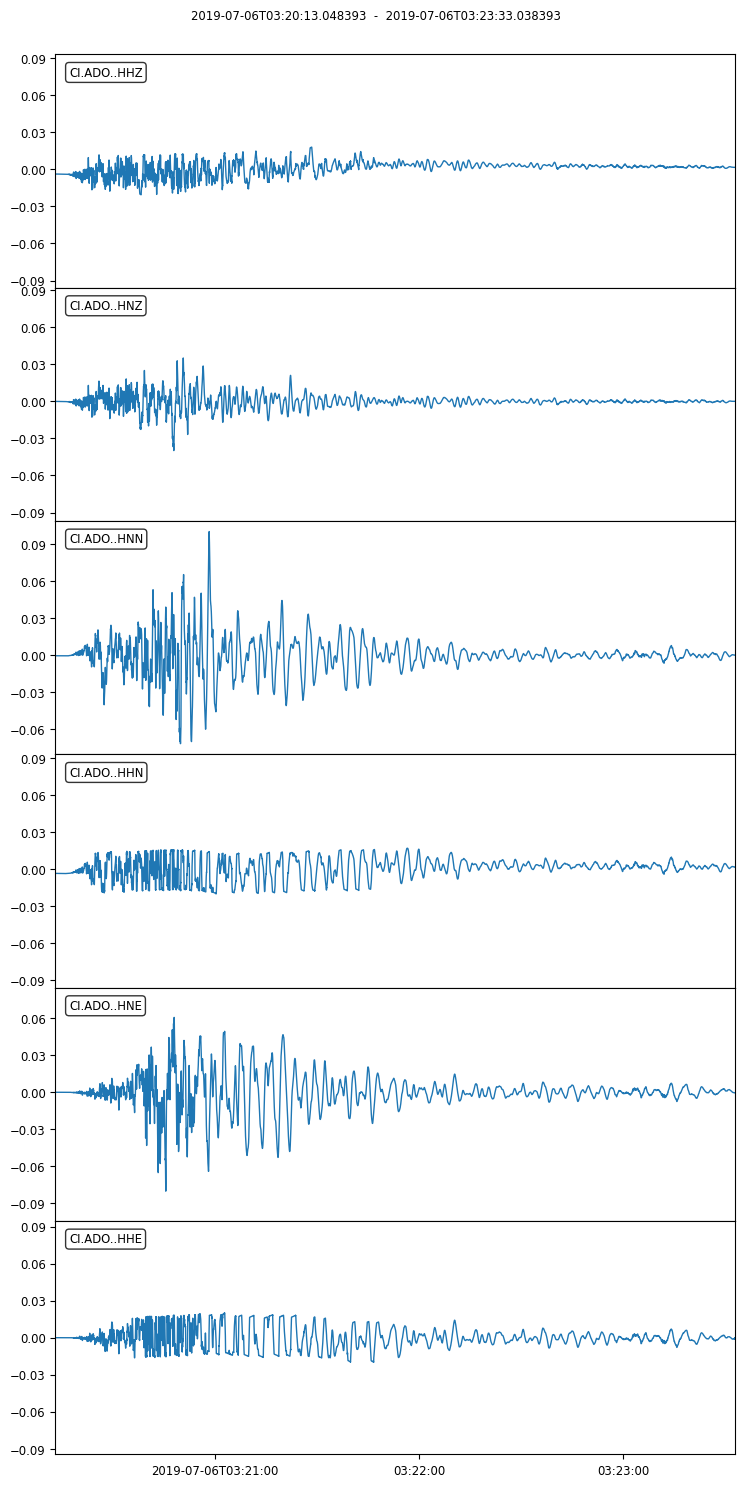

In [12]:
print('Removing the instrumental response (inplace)')

# What we are about to do is an INPLACE operation, meaning that the data array
# of each Trace will be PERMANENTLY modified. This is a COMMON feature in MOST
# Stream/Trace operation, pay attention to it!

# In this context, it would mean that, if for some reason we need
# the original Stream after response removal, we would need to re-download it.
# A common procedure is to store beforehand a copy of the Stream before any inplace operation, e.g.:
# stream_original = stream.copy()
# Or perform inplace operations on a copy of the Trace/Stream:
stream_remresp = stream.copy().remove_response(inventory1)


print('Stream traces (note clipped signal for velocimeters *H* with strong earthquakes)')

# stream.plot()
stream_remresp.plot(color=None);
    

## Simple processing: HSRV computation

With our collection of Traces just downloaded, we can illustrate a simple processing 
(HSRV computation)

Amplitude spectra (for illustrative purposes only)


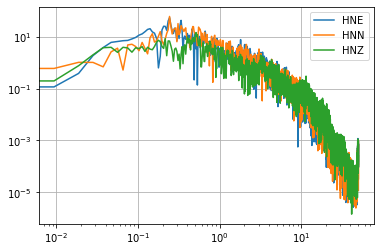

Amplitude spectra smoothed


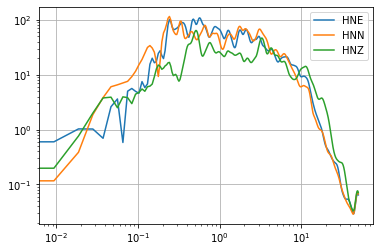

HV


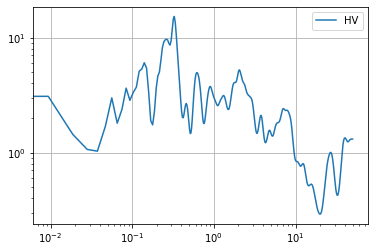

In [13]:
import numpy as np
from obspy.signal.konnoohmachismoothing import konno_ohmachi_smoothing as ko_smooth
from obspy import UTCDateTime
from matplotlib import pyplot as plt

traces = stream_remresp.select(channel='HN*')

e_trace = traces.select(channel='??E')[0].copy()
n_trace = traces.select(channel='??N')[0].copy()
z_trace = traces.select(channel='??Z')[0].copy()

# Trim:
endtime = UTCDateTime('2019-07-06T03:22:00')
e_trace_trimmed = e_trace.trim(endtime=endtime)
n_trace_trimmed = n_trace.trim(endtime=endtime)
z_trace_trimmed = z_trace.trim(endtime=endtime)

# assert the Trace have the same number of points:
assert len(e_trace_trimmed.data) == len(n_trace_trimmed.data) == len(z_trace_trimmed.data)
assert e_trace_trimmed.stats.delta == n_trace_trimmed.stats.delta == z_trace_trimmed.stats.delta


#Removing the mean from the trace
e_trace = e_trace_trimmed.detrend(type='constant')
n_trace = n_trace_trimmed.detrend(type='constant')
z_trace = z_trace_trimmed.detrend(type='constant')

# Taper (after trim endpoints are !=0)
e_trace = e_trace.taper(max_percentage=0.05, type='cosine')  # , max_length=None, side='both', **kwargs)
n_trace = n_trace.taper(max_percentage=0.05, type='cosine')  # , max_length=None, side='both', **kwargs)
z_trace = z_trace.taper(max_percentage=0.05, type='cosine')  # , max_length=None, side='both', **kwargs)

# Stream([e_trace, n_trace, z_trace]).plot()

#Get the amplitude values (numpy array) from the resulting traces
e_array = e_trace.data
n_array = n_trace.data
z_array = z_trace.data

#Apply the fourier transformation to the arrays
e_fft = np.fft.rfft(e_array)
n_fft = np.fft.rfft(n_array)
z_fft = np.fft.rfft(z_array)

# amplitude spectrum
e_ampspec = np.abs(e_fft)
n_ampspec = np.abs(n_fft)
z_ampspec = np.abs(z_fft)

# compute the frequency bins (one is sufficient for all traces: same length, same dt):
freqs = np.fft.rfftfreq(e_array.size, d=e_trace.stats.delta)

print('Amplitude spectra (for illustrative purposes only)')

plt.loglog(freqs, e_ampspec, '-', label='HNE')
plt.loglog(freqs, n_ampspec, '-', label='HNN')
plt.loglog(freqs, z_ampspec, '-', label='HNZ')
plt.legend()
plt.grid()
plt.show()

#Smoothing
e_ampspec_smooth = ko_smooth(n_ampspec, freqs)
n_ampspec_smooth = ko_smooth(e_ampspec, freqs)
z_ampspec_smooth = ko_smooth(z_ampspec, freqs)

print('Amplitude spectra smoothed')

plt.loglog(freqs, e_ampspec_smooth, '-', label='HNE')
plt.loglog(freqs, n_ampspec_smooth, '-', label='HNN')
plt.loglog(freqs, z_ampspec_smooth, '-', label='HNZ')
plt.legend()
plt.grid()
plt.show()


# Computing HV

# Horizontal components mean:
h_ampspec_mean = np.sqrt(e_ampspec_smooth**2 + n_ampspec_smooth**2)
# divide the two components:
hv = np.divide(h_ampspec_mean, z_ampspec_smooth)

# if you are running in a loop you might want to return now
# the hv value

print('HV')

plt.loglog(freqs, hv, '-', label='HV')
plt.legend()
plt.grid()
plt.show()

#### Same as above, but with a better approach (decouple computation and the visualization)

this piece of code does the same as above but is more readable and maintainable

Amplitude spectra smoothed


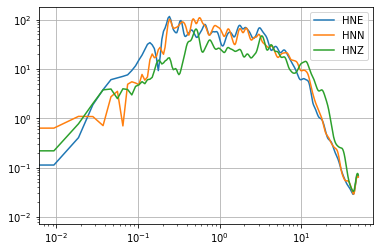

HV


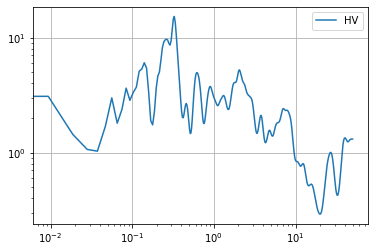

In [14]:
import urbasis_test_module as utm  # <- user defined module in this path
# if you make changes to a custom Python module, to see the changes here you need to re-load it:
# import importlib
# importlib.reload(utm)
from matplotlib import pyplot as plt

# smoothed ampspec:
feqs, e_ampspec_smooth = utm.smoothed_ampspec(e_trace_trimmed)
freqs, n_ampspec_smooth = utm.smoothed_ampspec(n_trace_trimmed)
freqs, z_ampspec_smooth = utm.smoothed_ampspec(z_trace_trimmed)
# Computing HV:
hv_ampspec = utm.hv_spectrum(e_ampspec_smooth, n_ampspec_smooth, z_ampspec_smooth)

# Done. Now you can use the notebook to plot inspect and visualize the data:

print('Amplitude spectra smoothed')
plt.loglog(freqs, e_ampspec_smooth, '-', label='HNE')
plt.loglog(freqs, n_ampspec_smooth, '-', label='HNN')
plt.loglog(freqs, z_ampspec_smooth, '-', label='HNZ')
plt.legend()
plt.grid()
plt.show()

print('HV')
plt.loglog(freqs, hv, '-', label='HV')
plt.legend()
plt.grid()
plt.show()

## Other web services / Engeneering Strong Motion database (ESM)

(Web portal [here](https://esm-db.eu/#/home))

ESM, the Engineering Strong-Motion Database, provides a set of facilities to search, select, download and analyse ground-motion data and associated metadata.

As a [web service](https://esm-db.eu/#/data_and_services/web_services) it can be accessed as any FDSN web service, e.g. [through a Web portal](https://esm-db.eu/#/home) or client software, but is opartially FDSN-compliant, meaning that it, or any other strong motion database, might not implement the same URLs, methods or parameter names

### Fetching data with client software (curl)

```bash
#!/bin/bash

# Token file name (change it if you need it):
TOKEN=esm_certif.txt

# If not available, create token
if [ -f $TOKEN ]
then
	echo "token already exists"
else
	echo "token does not exists, then requested" 
curl -X POST -F 'message={"user_email": "here_your_user_email", "user_password": "here_your_password"}' "https://esm-db.eu/esmws/generate-signed-message/1/query" -o certif.txt
fi

# Create catalog [see: https://esm-db.eu/fdsnws/event/1/query-options.html ]
curl -X POST -F "message=@$TOKEN" "https://esm-db.eu/fdsnws/event/1/query?starttime=2009-01-01T00:00:00&endtime=2017-12-31T23:59:59&longitude=13&latitude=43&maxradius=4&minmagnitude=5.6&maxdepth=30&includeallmagnitudes=True&format=text" -o cata_ita.txt

# Extract eve_id from the catalog
awk -F"|" 'NR>1{print $1}' cata_ita.txt  > lista_id

# Download [see: https://esm-db.eu/esmws/eventdata/1/query-options.html ]
for file in `cat lista_id`
do
	echo " >>"
	echo "Downloading: $file" 
	curl -X POST -F "message=@$TOKEN" "https://esm-db.eu/esmws/eventdata/1/query?eventid=$file&processing-type=MP&format=ascii" -o $file.zip 
done
```

Assuming we executed the first line above and we have a token, the same can be done via Python

### Fetching data with client software (Python)

#### Event query

In [15]:
from urllib import request
import os

# Check token:
token_file_path = os.path.abspath('./esm_certif.txt')  # dot -> relative to this directory
if not os.path.isfile(token_file_path):
    raise Exception('No token file found. Get a token and save it as esm_certif.txt in the directory of this notebook')

# Build URL:
esm_event_baseurl = "https://esm-db.eu/fdsnws/event/1/query"
esm_event_url = esm_event_baseurl + "?starttime=2009-01-01T00:00:00&endtime=2017-12-31T23:59:59&longitude=13&latitude=43&maxradius=4&minmagnitude=5.6&maxdepth=30&includeallmagnitudes=True&format=text"
print(esm_event_url)

# Download restricted data with token (copied and modified - it was Python2 - from https://stackoverflow.com/a/13827087)
# For other types of authentication (e.g. user /password) see https://docs.python.org/3/howto/urllib2.html#id5
req = request.Request(esm_event_url, method="GET", headers={'Authorization': token_file_path})
with request.urlopen(req) as r:
    content = r.read()
print('\nResponse content (bytes):\n')
print(content)

# Convert to DataFrame and show result
print('\nResponse content (converted to DataFrame):\n')
b = BytesIO(content[1:])
dfr = pd.read_csv(b, sep='|')
display(dfr)

https://esm-db.eu/fdsnws/event/1/query?starttime=2009-01-01T00:00:00&endtime=2017-12-31T23:59:59&longitude=13&latitude=43&maxradius=4&minmagnitude=5.6&maxdepth=30&includeallmagnitudes=True&format=text

Response content (bytes):

b'ev_id|origin_time|latitude|longitude|depth_km|origin_ref_abbr|mag_value|mag_type_code|mag_ref_abbr|event_name\nEMSC-20161030_0000029|2016-10-30T06:40:18|42.8322|13.1107|9.2|INGV-BULLETIN|6.5|mw|INGV-webservice|CENTRAL_ITALY\nEMSC-20161026_0000095|2016-10-26T19:18:06|42.9087|13.1288|7.5|INGV-BULLETIN|5.9|mw|INGV-webservice|CENTRAL_ITALY\nEMSC-20160824_0000006|2016-08-24T01:36:32|42.6983|13.2335|8.1|INGV-BULLETIN|6|mw|INGV-webservice|CENTRAL_ITALY\nIT-2012-0011|2012-05-29T07:00:02|44.8417|11.0657|8.07|INGV-CNT_Seismic_Bulletin|6|mw|RCMT-INGV|EMILIA_2ND_SHOCK\nIT-2012-0008|2012-05-20T02:03:50|44.8955|11.2635|9.5|INGV-CNT_Seismic_Bulletin|6.1|mw|RCMT-INGV|EMILIA_1ST_SHOCK\nIT-2009-0009|2009-04-06T01:32:40|42.342|13.38|8.3|INGV-CNT_Seismic_Bulletin|6.1|mw|INGV-CNT

,v_id,origin_time,latitude,longitude,depth_km,origin_ref_abbr,mag_value,mag_type_code,mag_ref_abbr,event_name
0,EMSC-20161030_0000029,2016-10-30T06:40:18,42.8322,13.1107,9.20,INGV-BULLETIN,6.5,mw,INGV-webservice,CENTRAL_ITALY
1,EMSC-20161026_0000095,2016-10-26T19:18:06,42.9087,13.1288,7.50,INGV-BULLETIN,5.9,mw,INGV-webservice,CENTRAL_ITALY
2,EMSC-20160824_0000006,2016-08-24T01:36:32,42.6983,13.2335,8.10,INGV-BULLETIN,6.0,mw,INGV-webservice,CENTRAL_ITALY
3,IT-2012-0011,2012-05-29T07:00:02,44.8417,11.0657,8.07,INGV-CNT_Seismic_Bulletin,6.0,mw,RCMT-INGV,EMILIA_2ND_SHOCK
4,IT-2012-0008,2012-05-20T02:03:50,44.8955,11.2635,9.50,INGV-CNT_Seismic_Bulletin,6.1,mw,RCMT-INGV,EMILIA_1ST_SHOCK
5,IT-2009-0009,2009-04-06T01:32:40,42.3420,13.3800,8.30,INGV-CNT_Seismic_Bulletin,6.1,mw,INGV-CNT_Seismic_Bulletin,L_AQUILA


#### Data query (miniSEED)

In [16]:
from zipfile import ZipFile
from io import BytesIO
from obspy import read, Stream

esm_data_baseurl = "https://esm-db.eu/esmws/eventdata/1/query"

for ev_id, ev_time in zip(dfr.v_id, dfr.origin_time):
    esm_data_url = esm_data_baseurl + "?eventid=%s&processing-type=MP&network=IT&station=NRC&format=mseed" % str(ev_id)
    req = request.Request(esm_data_url, headers={'Authorization': token_file_path})  # 
    
    print(esm_data_url + "\n")

    with request.urlopen(req) as r:
        content = r.read()

    ## Now you can save the downloaded content to file, e.g.:
    # outfile = str(ev_id) + '.mseed.zip'
    # with open(outfile, 'wb') as r:
    #    r.write(content)
    
    # Or, if you do not need to save the data but process it, let's
    # read it into a Stream object:
    traces = {}
    try:
        zfile = ZipFile(BytesIO(content), "r")  # create a ZipFile from bytes data (from memory, not from disk)
        stream = Stream()
        for file in zfile.namelist():
            with zfile.open(file) as myfile:
                data = BytesIO(myfile.read())
                stream.append(read(data, format='MSEED')[0])  # append first (and only) Trace to our `stream` object
        # now you can work with your Stream ... (we just print its string representation here)
        print()
        print(stream)
    except Exception as exc:
        print('ERROR: %s' % str(exc))
    print('\nExiting (showing first Trace only)')
    break  # just show first example

https://esm-db.eu/esmws/eventdata/1/query?eventid=EMSC-20161030_0000029&processing-type=MP&network=IT&station=NRC&format=mseed


3 Trace(s) in Stream:
IT.NRC.00.HGE | 2016-10-30T06:40:13.314000Z - 2016-10-30T06:41:03.309000Z | 200.0 Hz, 10000 samples
IT.NRC.00.HGN | 2016-10-30T06:40:13.314000Z - 2016-10-30T06:41:03.309000Z | 200.0 Hz, 10000 samples
IT.NRC.00.HGZ | 2016-10-30T06:40:13.314000Z - 2016-10-30T06:41:03.309000Z | 200.0 Hz, 10000 samples

Exiting (showing first Trace only)


#### Data query ([ascii](https://esm-db.eu/#/documents/user_manual))

In [17]:
from zipfile import ZipFile
from io import BytesIO
from datetime import datetime
from obspy import Stream, Trace, UTCDateTime

# define a function to read ESM formatted data
# (this could also go into a separate Python module):
def read_esm_ascii(zipfile):
    """
    Read downloaded esm zip file in ascii format, extracting all waveforms data
    
    :return: a dict[waveform_name, dict[property_name, property_value]].
        For each waveform, the property names are those specified in the ESM format
        (https://esm-db.eu/#/documents/user_manual) plus the property 'waveform' 
        that returns the waveform data as numpy array 
    """
    all_data = {}
    for file in zipfile.namelist():
        # read the file
        data = {'waveform': []}
        with zipfile.open(file) as myfile:
            for linenum, line in enumerate(myfile):
                line = line.decode('utf8').strip()
                if linenum < 64:
                    idx = line.find(':')
                    name = line[:idx].strip()
                    value = line[idx+1:].strip()
                    data[name] = value
                else:
                    data['waveform'].append(line)
        if data['waveform']:
            data['waveform'] = np.array(data['waveform'], dtype=float)
            all_data[file] = data    
    return all_data


for ev_id, ev_time in zip(dfr.v_id, dfr.origin_time):
    esm_data_url = esm_data_baseurl + "?eventid=%s&processing-type=MP&network=IT&station=NRC&format=ascii" % str(ev_id)
    req = request.Request(esm_data_url, headers={'Authorization': token_file_path})
    
    print(esm_data_url)
    with request.urlopen(req) as r:
        content = r.read()

    ## Now you can save the downloaded content to file, e.g.:
    # outfile = str(ev_id) + '.ascii.zip'
    # with open(outfile, 'wb') as r:
    #    r.write(content)
    
    # Or, if you do not need to save the data but process it, let's
    # read it into a Stream object (quick and dirty conversion below, there might be a better
    # way to do it, check ESM site in case):
    stream = Stream()
    zfile = ZipFile(BytesIO(content), "r")  # create a ZipFile from bytes data (in memory, not from disk)
    waveforms_data = read_esm_ascii(zfile)
    for name, data in waveforms_data.items():
        # parse starttime (str) into a datetime object:
        starttime_str = data['DATE_TIME_FIRST_SAMPLE_YYYYMMDD_HHMMSS']
        dot_idx = starttime_str.rfind('.')
        msec = 0
        if dot_idx > -1:  # found millisec/microsec in starttime
            starttime_str, msec = starttime_str[:dot_idx], starttime_str[dot_idx+1:]
            msec = msec.ljust(6, '0')
            msec = int(msec)
        starttime = datetime.strptime(starttime_str, '%Y%m%d_%H%M%S')  # YYYYMMDD_HHMMSS
        starttime = starttime.replace(microsecond=msec)
        # Build the Trace 'stats' object
        trace_stats = {
            'network': data['NETWORK'],
            'station': data['STATION_CODE'],
            'location': data['LOCATION'],
            'channel': data['STREAM'],
            'starttime': UTCDateTime(starttime),
            'delta': float(data['SAMPLING_INTERVAL_S'])
        }
        # build a ObsPy Trace:
        trace = Trace(data['waveform'], trace_stats)
        stream.append(trace)
    print()
    print(stream)
    print('\nExiting (showing first Trace only)')
    break  # just show first example

https://esm-db.eu/esmws/eventdata/1/query?eventid=EMSC-20161030_0000029&processing-type=MP&network=IT&station=NRC&format=ascii

3 Trace(s) in Stream:
IT.NRC..HGE | 2016-10-30T06:40:13.313000Z - 2016-10-30T06:41:03.308000Z | 200.0 Hz, 10000 samples
IT.NRC..HGN | 2016-10-30T06:40:13.313000Z - 2016-10-30T06:41:03.308000Z | 200.0 Hz, 10000 samples
IT.NRC..HGZ | 2016-10-30T06:40:13.313000Z - 2016-10-30T06:41:03.308000Z | 200.0 Hz, 10000 samples

Exiting (showing first Trace only)
